# Analyse BlueSeis BSPF Event Analysis - S-Transform

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from andbro__store_as_pickle import __store_as_pickle
from andbro__savefig import __savefig

In [2]:
from functions.compute_backazimuth import __compute_backazimuth

In [4]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [31]:
config = {}

## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643

## 
config['path_to_mseed'] = data_path+"BSPF/data/waveforms/ACC/"

## event selction
config['path_to_data'] = data_path+"BSPF/data/"

## output path for figures
config['output_figs'] = data_path+"BSPF/figures/cwt/"


## Load Data

In [25]:
events = obs.read_events(config['path_to_data']+"catalogs/BSPF_catalog_20221001_20230930_all.xml")

event_times = pd.read_pickle(config['path_to_data']+"event_selection_good.pkl")

In [26]:
num = 10

event_time = event_times.origin_time.loc[num]
event = events.filter(f"time >= {event_time}",f"time <= {event_time}")

## prepare string
event_time_str = event_time.split(".")[0].replace(" ","_").replace("-","").replace(":","")

In [33]:
config['fmin'], config['fmax'] = 0.1, 20.0

In [37]:
st = obs.read(config['path_to_mseed']+f"*{event_time_str}*")

st.detrend("simple")

st.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

# st.plot(equal_scale=False);

15 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHN  | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHZ  | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJE | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJN | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJZ | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJE | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJN | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJZ | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJE | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 

15 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHN  | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHZ  | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJE | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJN | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJZ | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJE | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJN | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJZ | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJE | 2023-03-01T22:48:53.569538Z - 2023-03-01T22:49:53.569538Z | 40.0 Hz, 

In [36]:
# cut_offs = [
#     (65,80), (65,80), (60,100), (60,100), (60,70),
#     (60,90), (60,90), (60,90), (62,105), (65,90),
#     (62,110), (65,85), (60,105), (63,105), (66,90),
#     (60,90), (65,90), (70,95),
# ]

# st.trim(st[0].stats.starttime+cut_offs[num][0], st[0].stats.endtime-cut_offs[num][1]);

## S-transform


In [38]:
def __makeplotStream_cwt(st, config, fscale=None):

    from scipy import fftpack
    from andbro__fft import __fft
    from numpy import array, log10, logspace, linspace
    from obspy.signal.tf_misfit import cwt
    from obspy.imaging.cm import obspy_sequential
    
    import matplotlib.pyplot as plt

    keys_expected = ['fmin', 'fmax']
    for key in keys_expected:
        if key not in config.keys():
            print(" -> keys missing in config")
            print(keys_expected)
            return
    
    
    NN = len(st)
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e3, r"mm/s"
        
    fig, axes = plt.subplots(NN,2,figsize=(13, 18), sharex='col')

    font = 13
    
    plt.subplots_adjust(hspace=0.1, wspace=0.2)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    

    for i, tr in enumerate(st):

        if tr.stats.channel[-2] == "J":
            scaling = rot_scaling
        elif tr.stats.channel[-2] == "H":
            scaling = trans_scaling
            
#         t = tr.times()
        t = np.linspace(0, tr.stats.delta * tr.stats.npts, tr.stats.npts)
        
#         tr = tr.normalize()
        
        scalogram = cwt(tr.data, tr.stats.delta, 8, config['fmin'], config['fmax'])

        x, y = np.meshgrid(t, logspace(log10(config['fmin']), log10(config['fmax']), scalogram.shape[0]))
#         x, y = np.meshgrid(t, linspace(config['fmin'], config['fmax'], scalogram.shape[0]))
         
    
        ## _________________________________________________________________
        if tr.stats.channel[-2] == "J" and tr.stats.station == "BSPF":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*rot_scaling,
                        color='black',
                        label='{}.{}.{}'.format(tr.stats.station, tr.stats.location, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)    
        
        if tr.stats.channel[-2] == "J" and tr.stats.station == "RPFO":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*rot_scaling,
                        color='darkred',
                        label='{}.{}.{}'.format(tr.stats.station, tr.stats.location, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)    


        elif tr.stats.channel[-2] == "H":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*trans_scaling,
                        color='darkblue',
                        label='{}.{}.{}'.format(tr.stats.station, tr.stats.location, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)    
        
#         axes[i,1].set_yscale("log")
        
        if tr.stats.channel[1] == "J":
            sym, unit = r"$\omega$ ", rot_unit
        elif tr.stats.channel[1] == "H":
            sym, unit = "$\ddot{u}$", trans_unit
        else:
            unit = "Amplitude", "a.u."
            
        axes[i,0].set_ylabel(f'{sym} ({unit})',fontsize=font)    
        axes[i,1].set_ylabel(f'$f$ (Hz)',fontsize=font)        
        axes[i,0].legend(loc='upper right', framealpha=1.0, fontsize=font-3)
        
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

        axes[i,0].tick_params(axis="y", labelsize=15)
        axes[i,0].tick_params(axis="x", labelsize=15)
        axes[i,1].tick_params(axis="y", labelsize=15)
        axes[i,1].tick_params(axis="x", labelsize=15)
        
    axes[NN-1,0].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)",fontsize=font)     
    axes[NN-1,1].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)",fontsize=font)     
    

    return fig

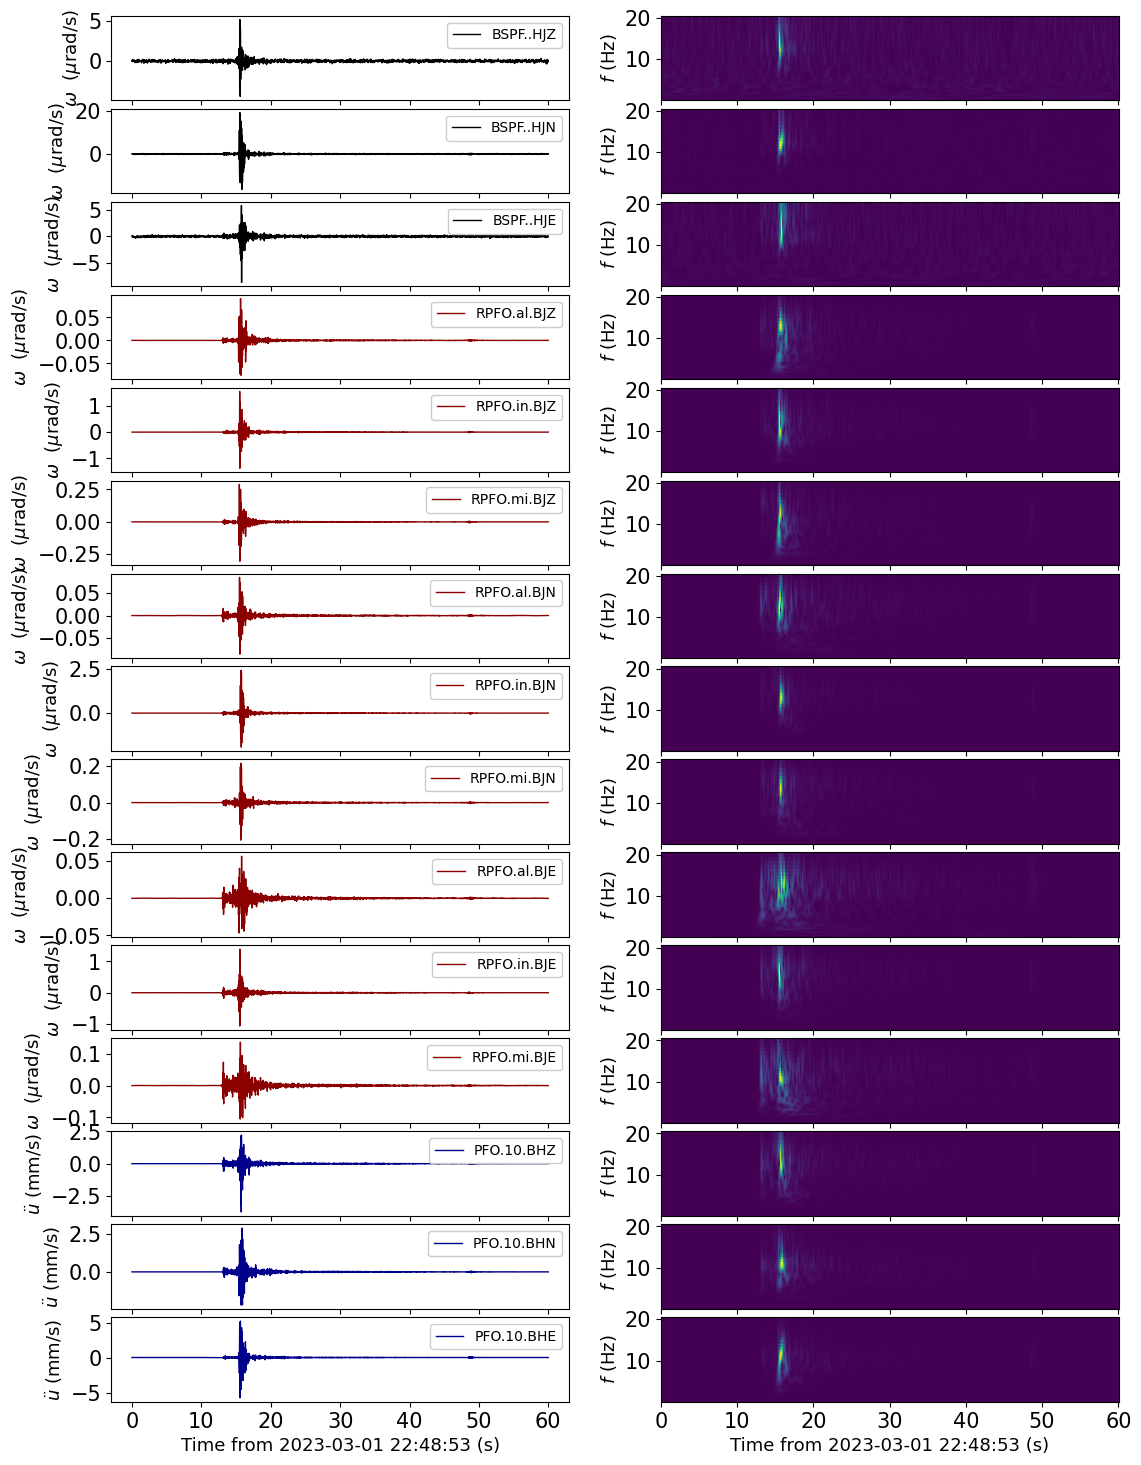

In [39]:
fig = __makeplotStream_cwt(st, config);

In [40]:
__savefig(fig, config['output_figs'], f"{event_time_str}_cwt", mode="png", dpi=200)


   -> saving /import/kilauea-data/BSPF/figures/cwt/20230301_224903_cwt.png ...

   -> Done



## AS LOOP

event 0
 -> failed for event 0
event 1
 -> failed for event 1
event 2

   -> saving /import/kilauea-data/BSPF/figures/cwt/20221015_051734_cwt.png ...

   -> Done

event 3

   -> saving /import/kilauea-data/BSPF/figures/cwt/20221023_092458_cwt.png ...

   -> Done

event 4
 -> failed for event 4
event 5

   -> saving /import/kilauea-data/BSPF/figures/cwt/20221231_121226_cwt.png ...

   -> Done

event 6

   -> saving /import/kilauea-data/BSPF/figures/cwt/20230109_194256_cwt.png ...

   -> Done

event 7
 -> failed for event 7
event 8

   -> saving /import/kilauea-data/BSPF/figures/cwt/20230115_095854_cwt.png ...

   -> Done

event 9
 -> failed for event 9
event 10

   -> saving /import/kilauea-data/BSPF/figures/cwt/20230301_224903_cwt.png ...

   -> Done

event 11
 -> failed for event 11
event 12
 -> failed for event 12
event 13

   -> saving /import/kilauea-data/BSPF/figures/cwt/20230417_185236_cwt.png ...

   -> Done

event 14
 -> failed for event 14
event 15
 -> failed for event 15
even

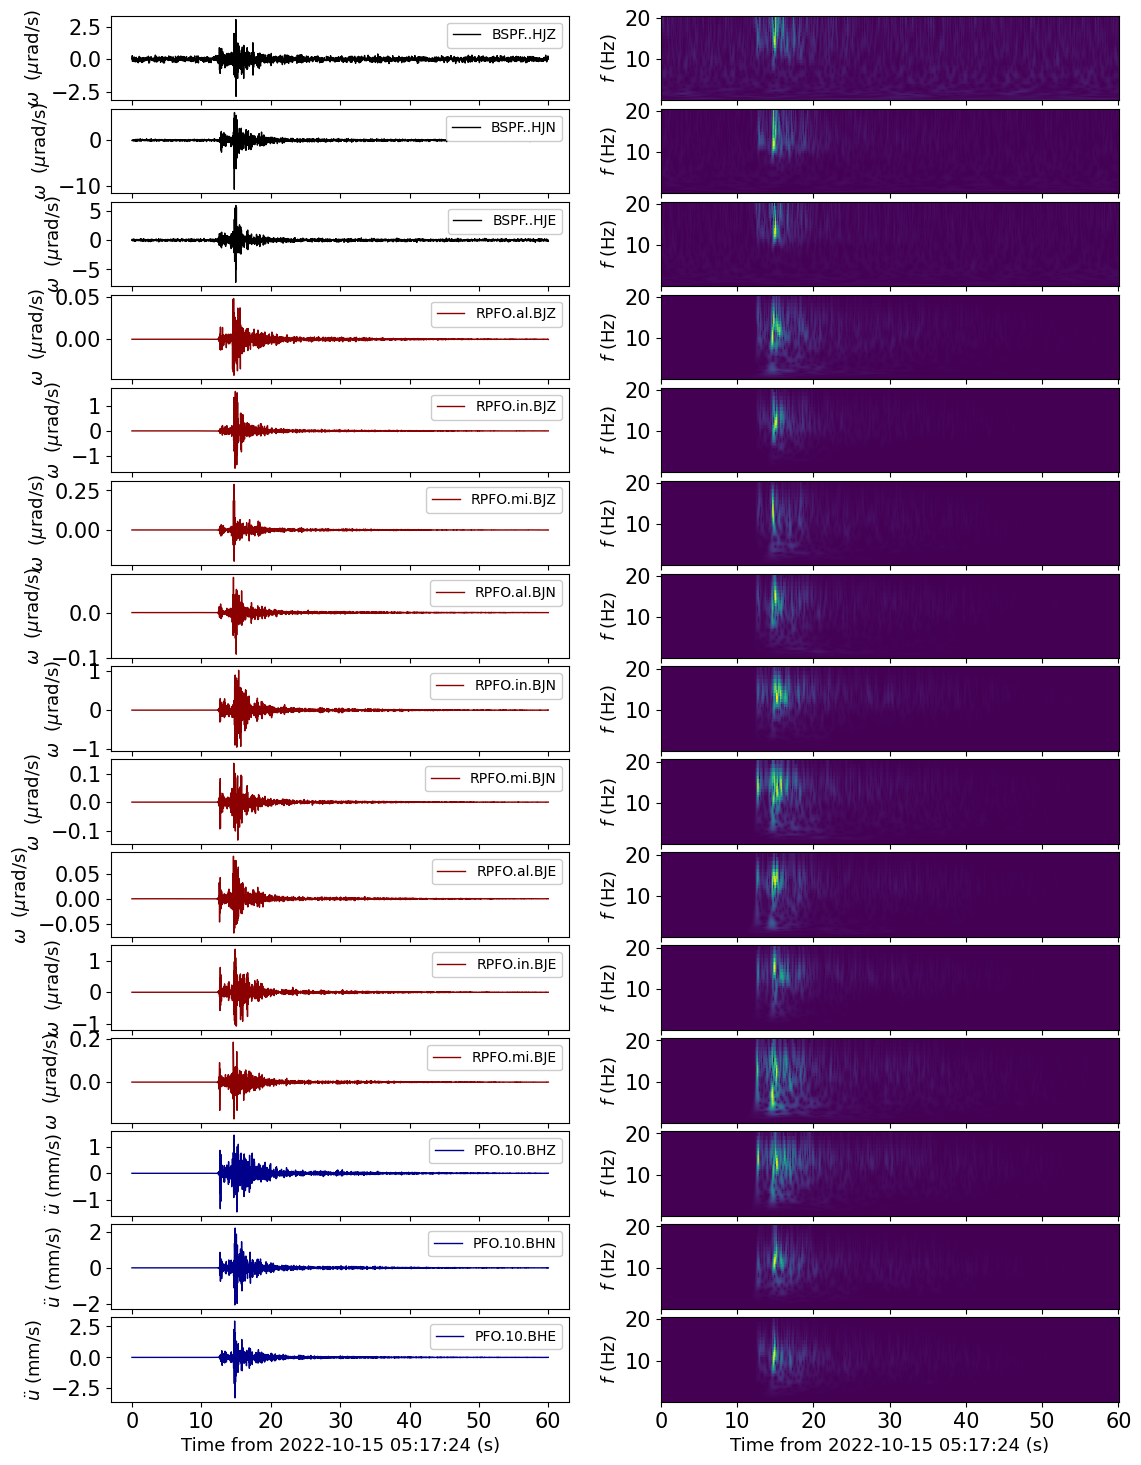

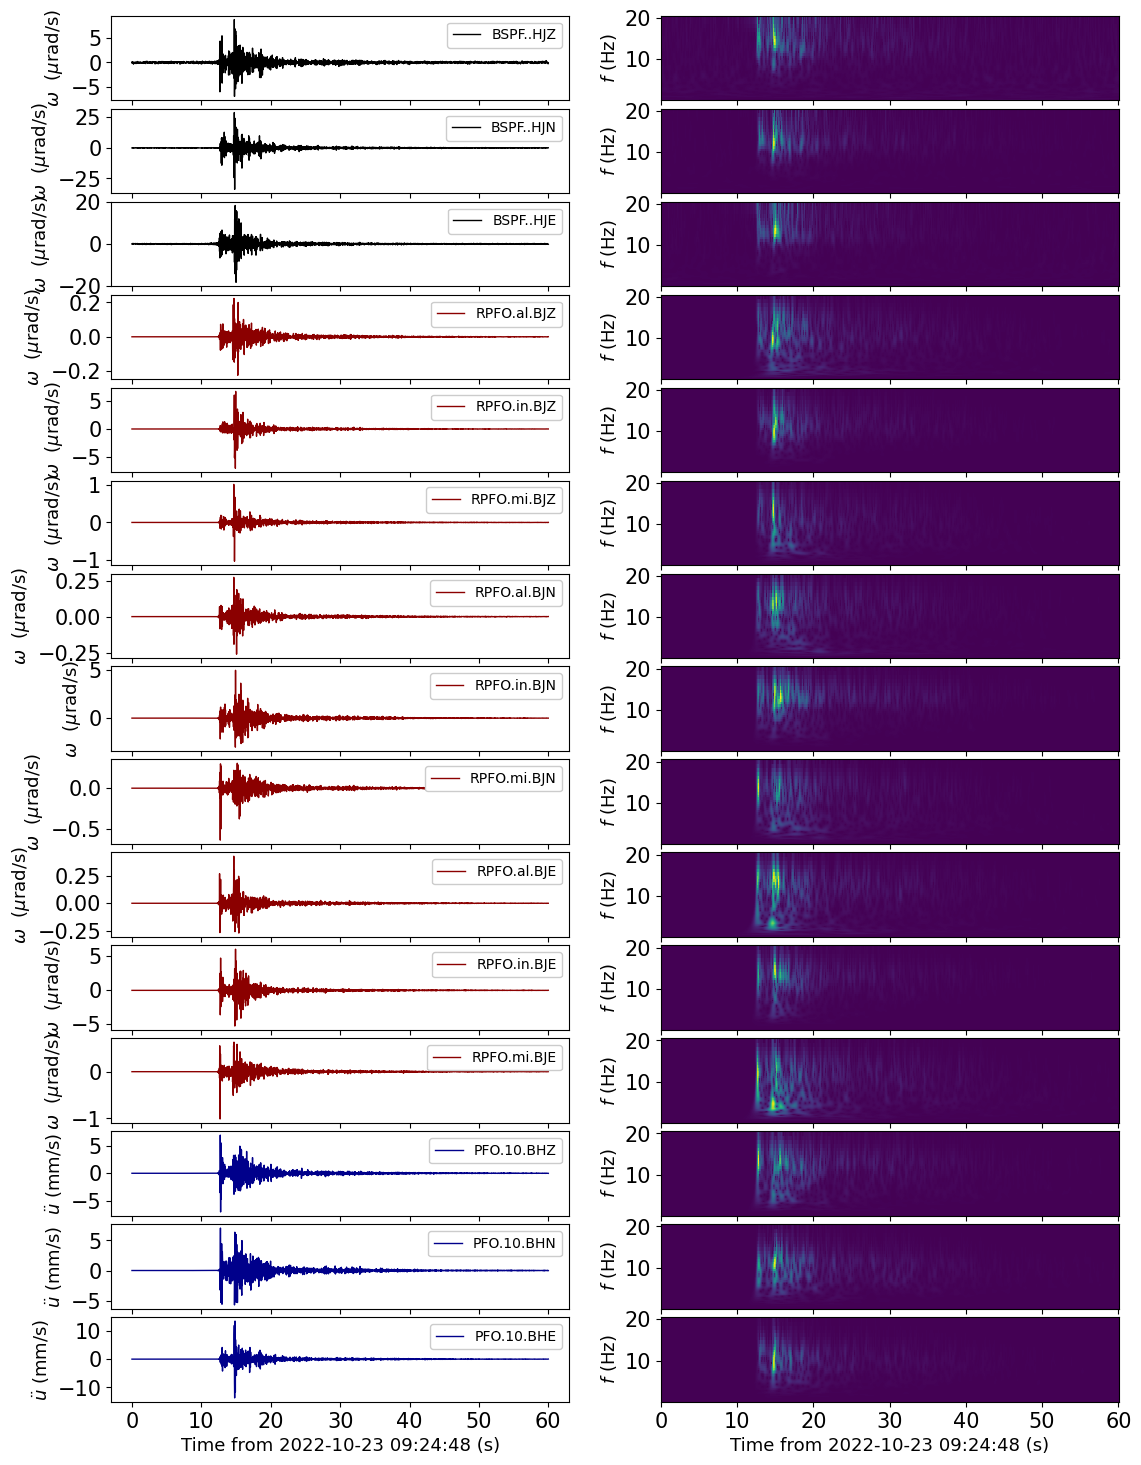

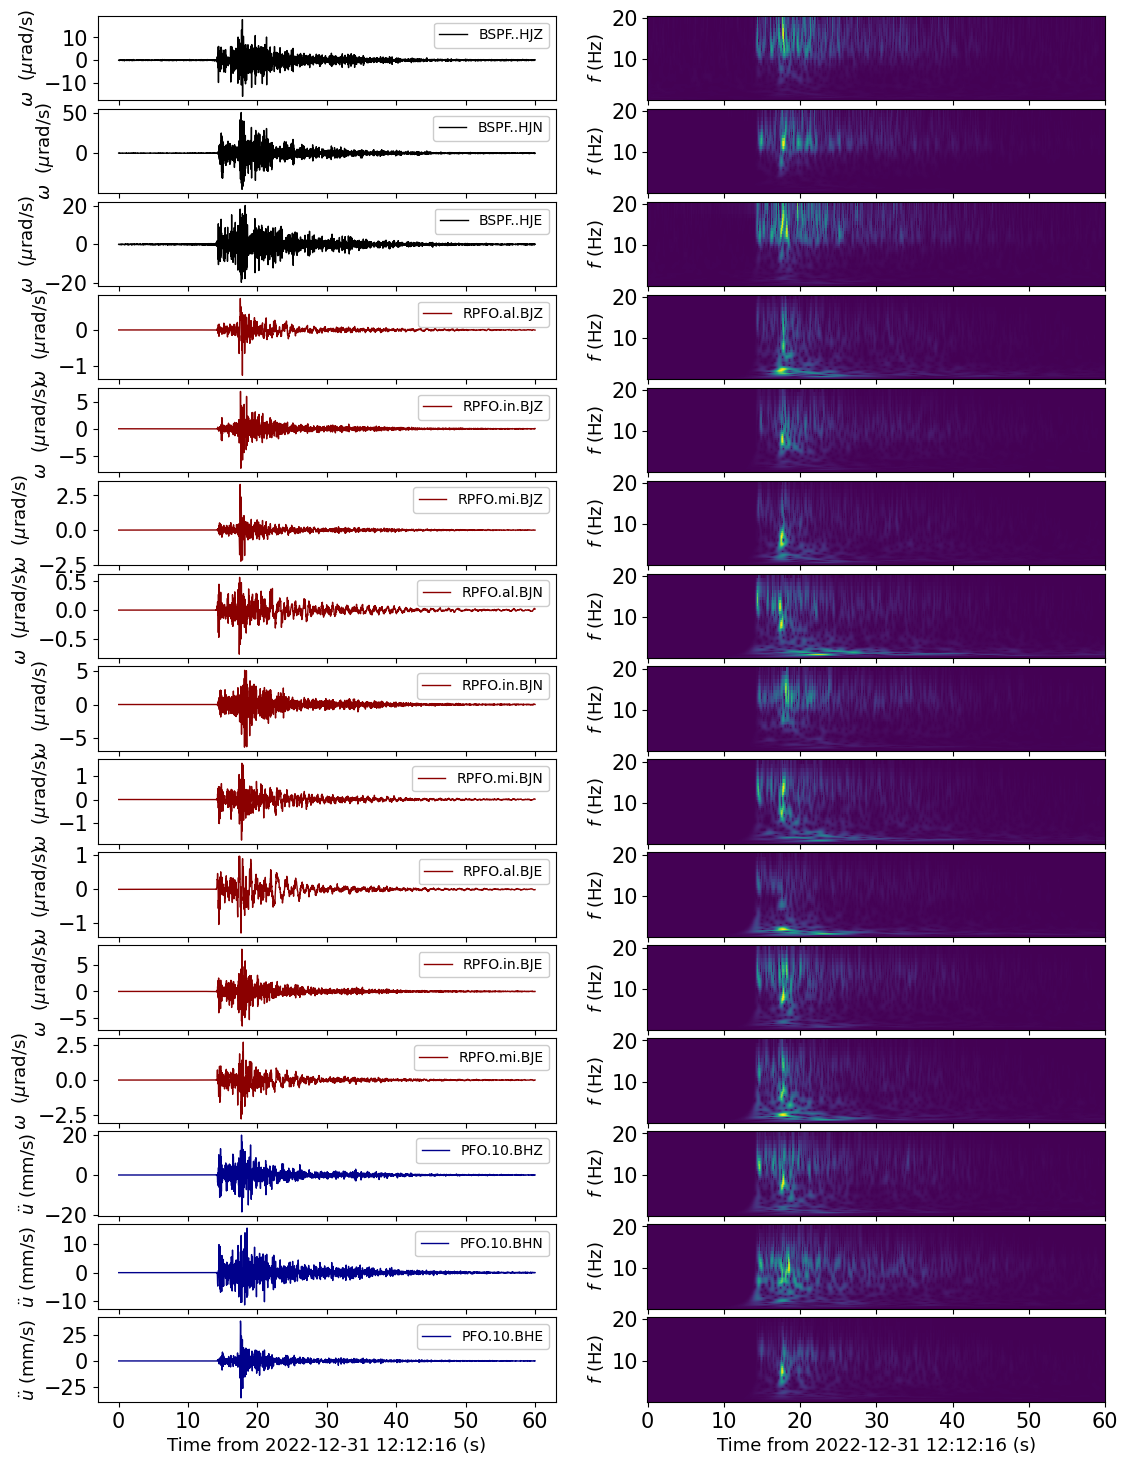

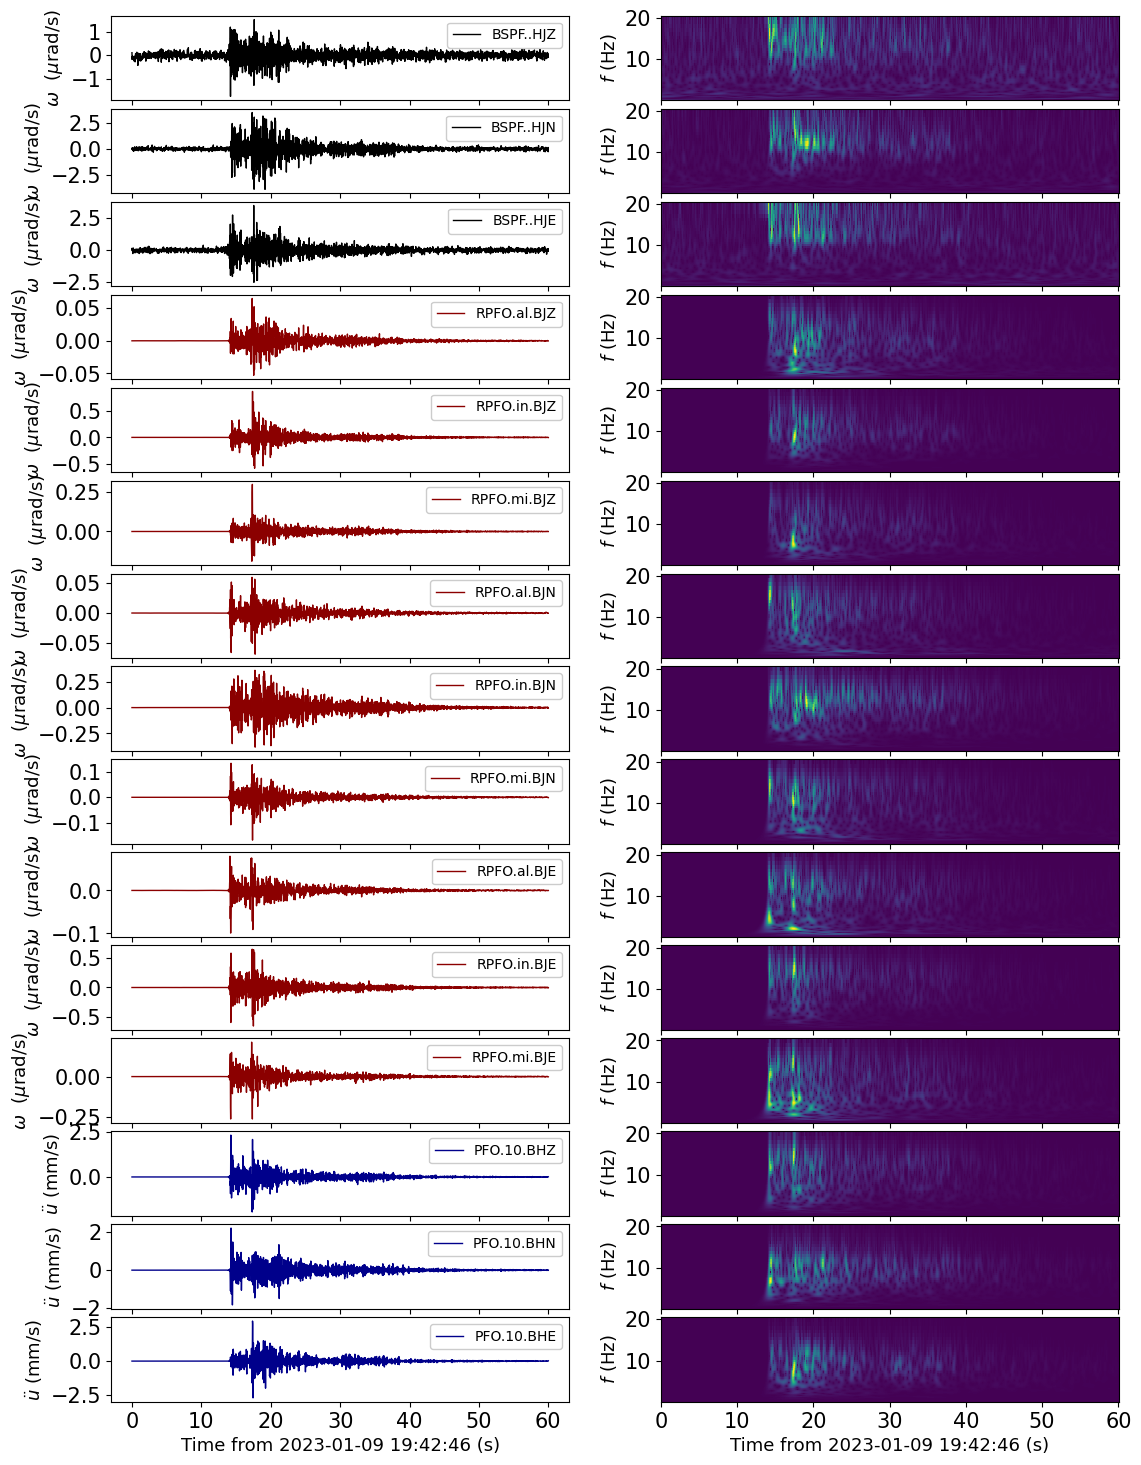

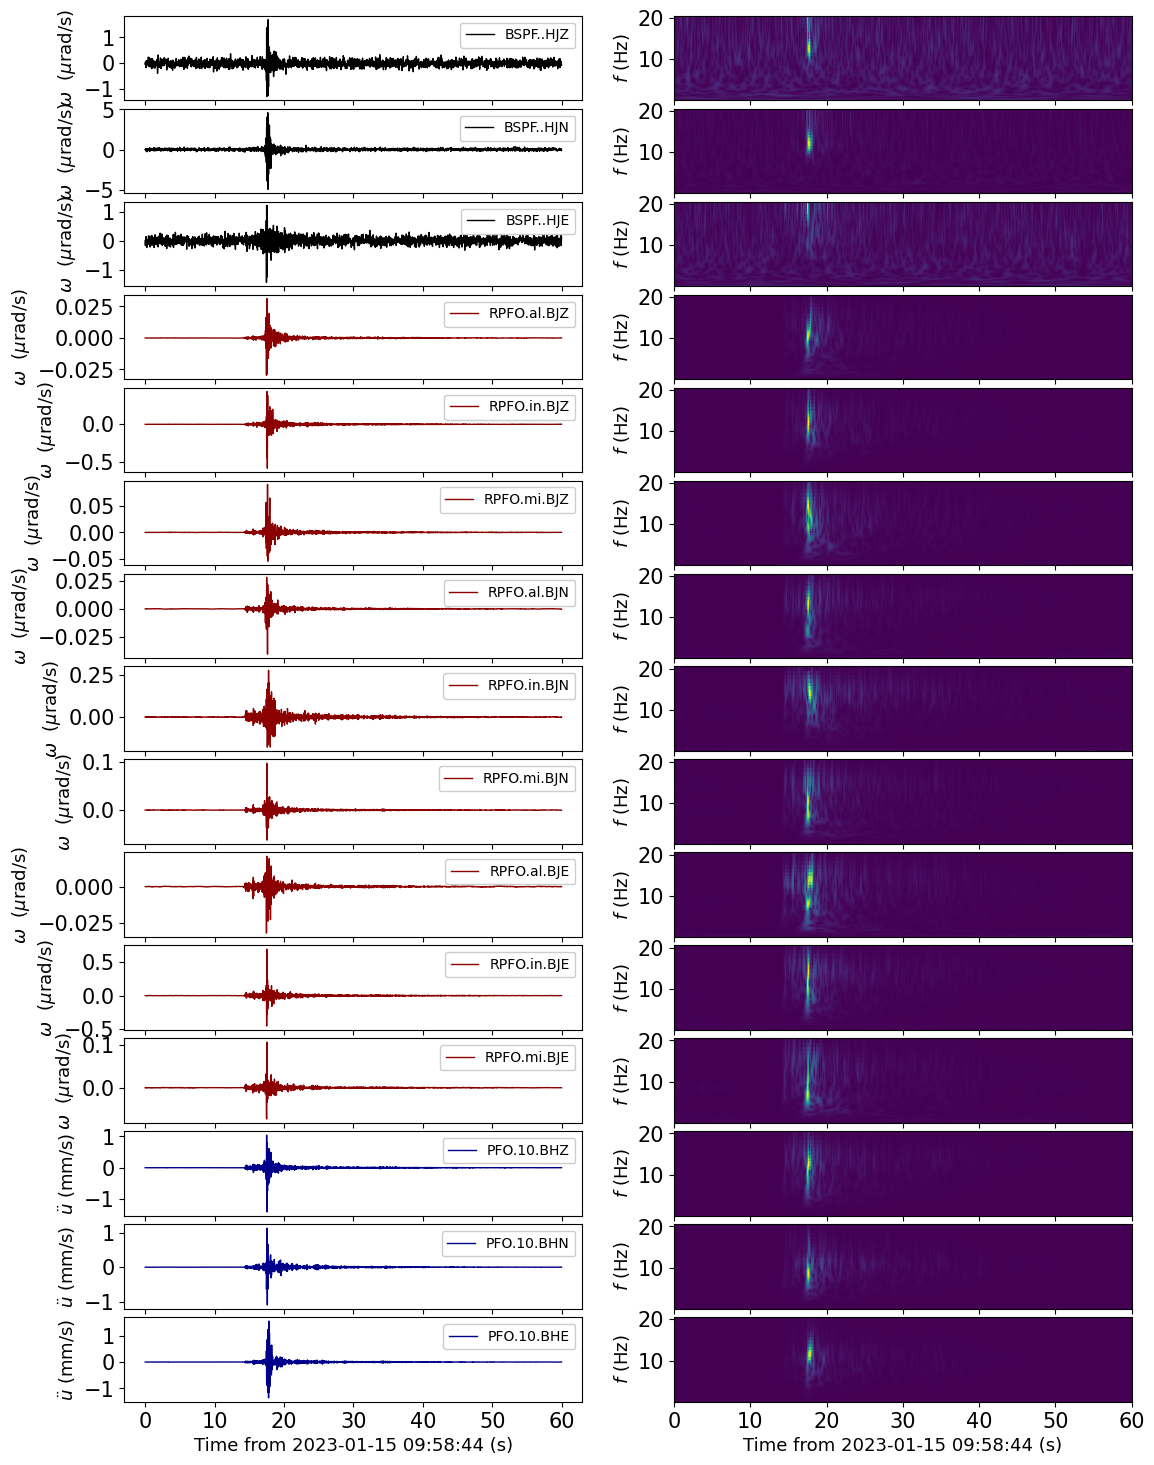

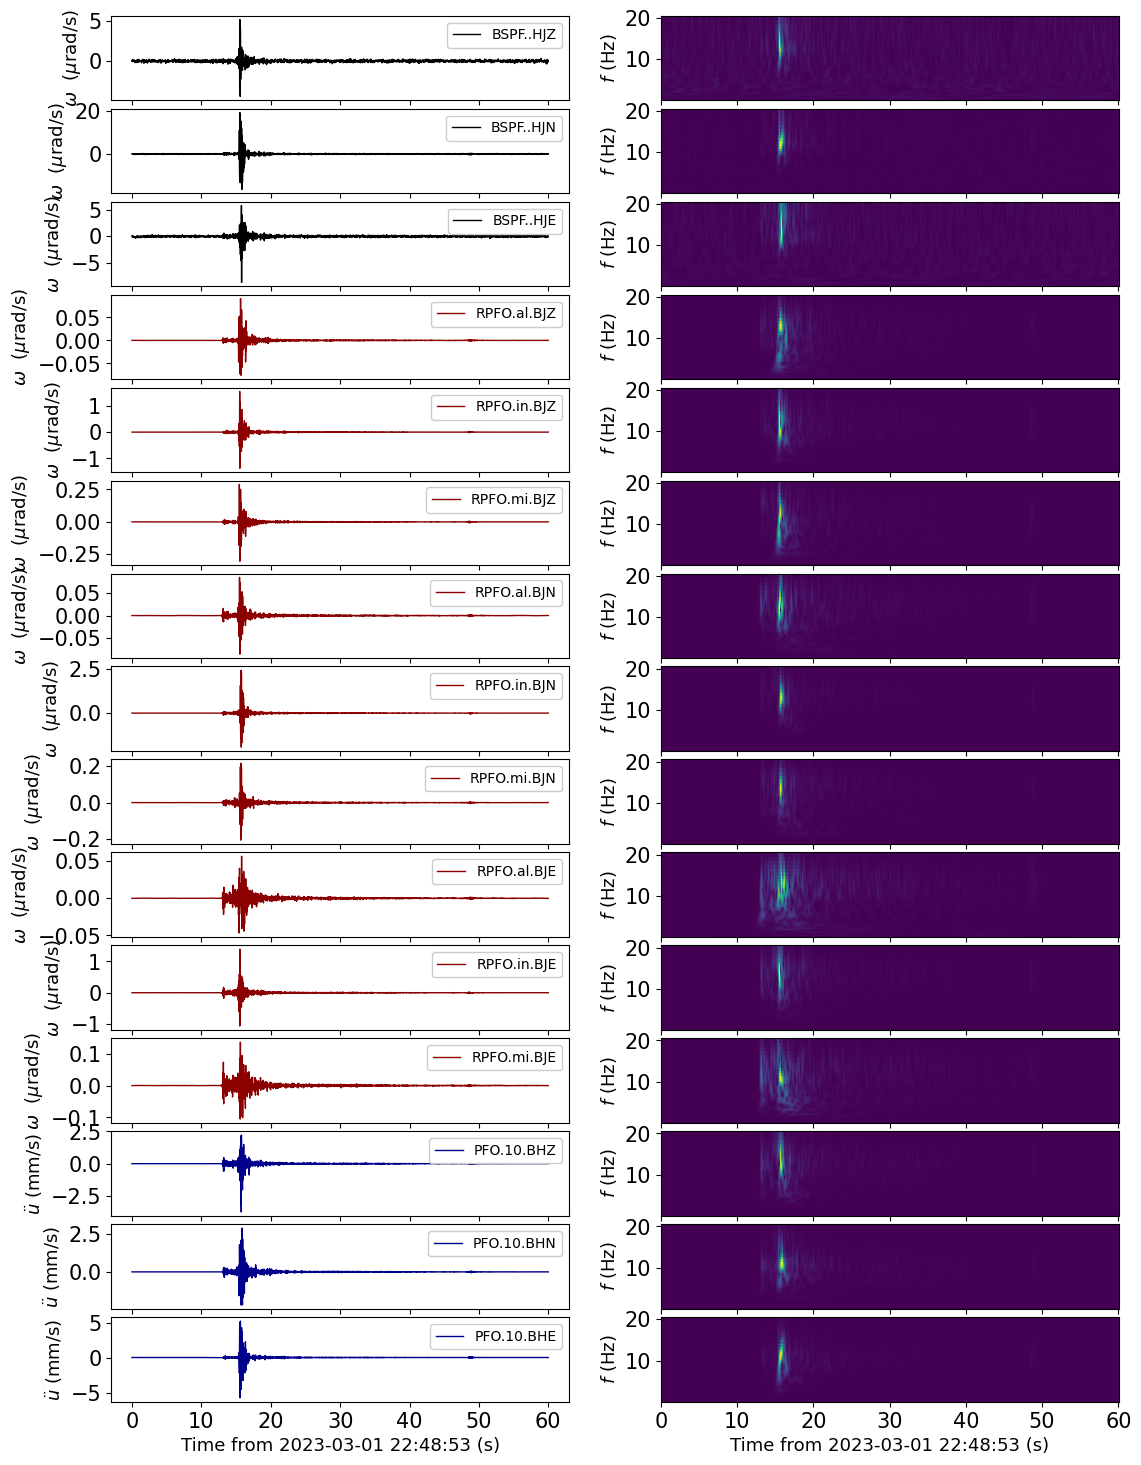

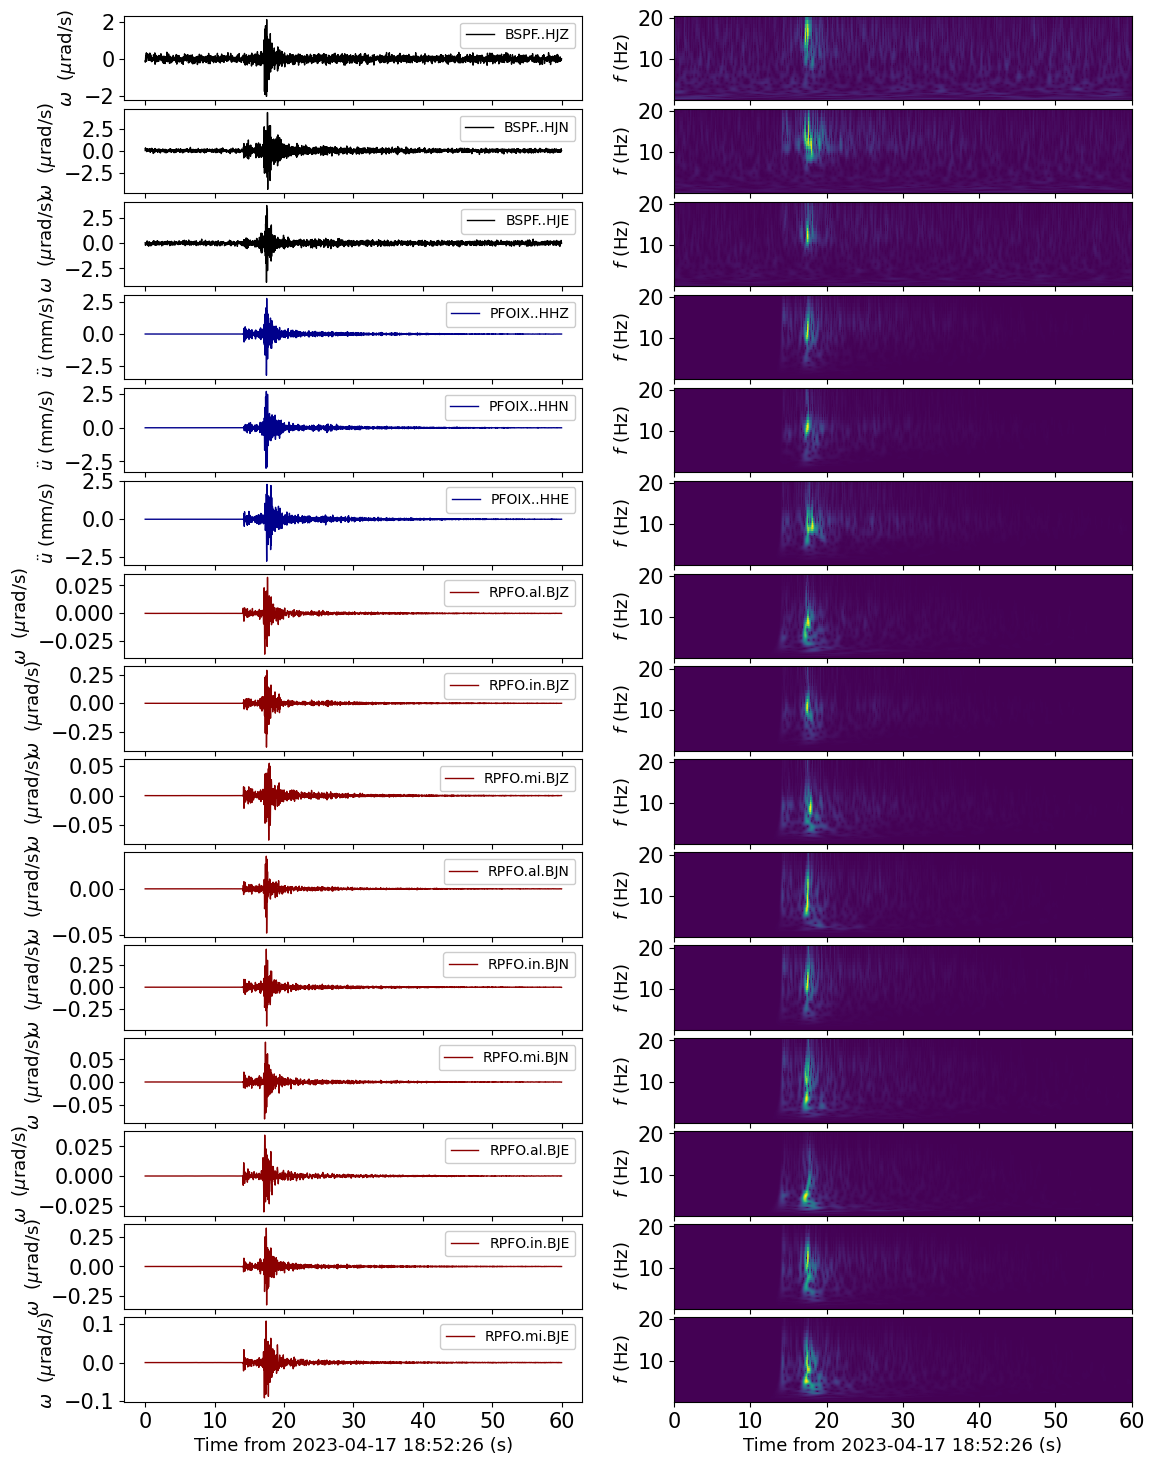

In [43]:
config['fmin'], config['fmax'] = 0.1, 20.0


for num in range(0, 17):

    print(f"event {num}")
    try:
        event_time = event_times.origin_time.loc[num]
        event = events.filter(f"time >= {event_time}",f"time <= {event_time}")

        ## prepare string
        event_time_str = event_time.split(".")[0].replace(" ","_").replace("-","").replace(":","")

        st = obs.read(config['path_to_mseed']+f"*{event_time_str}*")

        st = st.detrend("simple")

        st = st.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

        fig = __makeplotStream_cwt(st, config);

        fig.savefig(paconfig['output_figs']+f"{event_time_str}_cwt.png", format="png", dpi=200, bbox_inches='tight')

    except:
        print(f" -> failed for event {num}")